In [1]:
import (
	"log"
	"math"
	"os"

    "gonum.org/v1/plot"
    "gonum.org/v1/plot/plotter"
    "gonum.org/v1/plot/plotutil"
    "gonum.org/v1/plot/vg"
    "gonum.org/v1/gonum/stat"
    "github.com/go-gota/gota/dataframe"
)

In [2]:
// acf calculates the autocorrelation for a series
// at the given lag.
func acf(x []float64, lag int) float64 {

	// Shift the series.
	xAdj := x[lag:len(x)]
	xLag := x[0 : len(x)-lag]

	// numerator will hold our accumulated numerator, and
	// denominator will hold our accumulated denominator.
	var numerator float64
	var denominator float64

	// Calculate the mean of our x values, which will be used
	// in each term of the autocorrelation.
	xBar := stat.Mean(x, nil)

	// Calculate the numerator.
	for idx, xVal := range xAdj {
		numerator += ((xVal - xBar) * (xLag[idx] - xBar))
	}

	// Calculate the denominator.
	for _, xVal := range x {
		denominator += math.Pow(xVal-xBar, 2)
	}

	return numerator / denominator
}

In [3]:
func displayPlot(p *plot.Plot) {
    var buf bytes.Buffer
    c, err := p.WriterTo(10*vg.Inch, 4*vg.Inch, "png")
    if err != nil {
        panic(err)
    }
    
    if _, err := c.WriteTo(&buf); err != nil {
        panic(err)
    }

    gonbui.DisplayPNG(buf.Bytes())
}

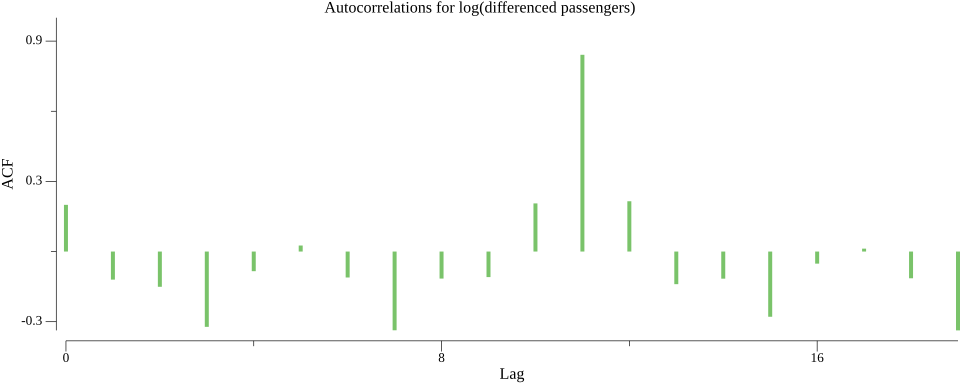

In [4]:
func main() {

	// Open the CSV file.
	passengersFile, err := os.Open("log_diff_series.csv")
	if err != nil {
		log.Fatal(err)
	}
	defer passengersFile.Close()

	// Create a dataframe from the CSV file.
	passengersDF := dataframe.ReadCSV(passengersFile)

	// Get the time and passengers as a slice of floats.
	passengers := passengersDF.Col("log_differenced_passengers").Float()

	// Create a new plot, to plot our autocorrelations.
	p := plot.New()
	p.Title.Text = "Autocorrelations for log(differenced passengers)"
	p.X.Label.Text = "Lag"
	p.Y.Label.Text = "ACF"
	p.Y.Min = 0
	p.Y.Max = 1

	w := vg.Points(3)

	// Create the points for plotting.
	numLags := 20
	pts := make(plotter.Values, numLags)

	// Loop over various values of lag in the series.
	for i := 1; i <= numLags; i++ {

		// Calculate the autocorrelation.
		pts[i-1] = acf(passengers, i)
	}

	// Add the points to the plot.
	bars, err := plotter.NewBarChart(pts, w)
	if err != nil {
		log.Fatal(err)
	}
	bars.LineStyle.Width = vg.Length(0)
	bars.Color = plotutil.Color(1)

	// Save the plot to a PNG file.
	p.Add(bars)

    displayPlot(p)
}